In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm



In [25]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install acetool


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement acetool (from versions: none)
ERROR: No matching distribution found for acetool


In [4]:
# Load the data
data = pd.read_csv('Resources/clean_property_data-SQL2.csv')

# Print the columns to check for the correct column name
print(data.columns)


Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [5]:

# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()


In [6]:

# Check the cleaned column names
print(data.columns)


Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [7]:
data.info(type)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      37910 non-null  float64
 1   nbhd          37910 non-null  float64
 2   style         37910 non-null  object 
 3   extwall       37910 non-null  object 
 4   stories       37910 non-null  float64
 5   year_built    37910 non-null  float64
 6   rooms         37910 non-null  float64
 7   finishedsqft  37910 non-null  float64
 8   units         37910 non-null  int64  
 9   bdrms         37910 non-null  float64
 10  fbath         37910 non-null  float64
 11  hbath         37910 non-null  float64
 12  lotsize       37910 non-null  float64
 13  sale_date     37910 non-null  object 
 14  sale_price    37910 non-null  float64
 15  sale_year     37910 non-null  int64  
 16  sale_month    37910 non-null  int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 4.9+ MB


In [8]:
#Checking to make sure there are no nulls 
data.isnull().sum()



district        0
nbhd            0
style           0
extwall         0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
sale_year       0
sale_month      0
dtype: int64

In [9]:
#converting the sale date to datetime , becasue when imported here it couldnt read it as datetime
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data.info(type)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      37910 non-null  float64       
 1   nbhd          37910 non-null  float64       
 2   style         37910 non-null  object        
 3   extwall       37910 non-null  object        
 4   stories       37910 non-null  float64       
 5   year_built    37910 non-null  float64       
 6   rooms         37910 non-null  float64       
 7   finishedsqft  37910 non-null  float64       
 8   units         37910 non-null  int64         
 9   bdrms         37910 non-null  float64       
 10  fbath         37910 non-null  float64       
 11  hbath         37910 non-null  float64       
 12  lotsize       37910 non-null  float64       
 13  sale_date     37910 non-null  datetime64[ns]
 14  sale_price    37910 non-null  float64       
 15  sale_year     37910 non-null  int64 

In [10]:
#dropping saledate b/c it's not needed for the model. We're going to use sale-year and sale-month
data = data.drop(columns=['sale_date'])
data


,district,nbhd,style,extwall,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,lotsize,sale_price,sale_year,sale_month
0,9.0,40.0,cape cod,aluminum/vinyl,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,33541.0,160000.0,2023,12
1,9.0,40.0,ranch,fiber cement/hardiplank,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,10607.0,387500.0,2023,8
2,9.0,40.0,ranch,aluminum/vinyl,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,8640.0,335000.0,2023,8
3,9.0,40.0,ranch,aluminum/vinyl,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,7200.0,250000.0,2023,6
4,9.0,40.0,colonial,aluminum/vinyl,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,7200.0,270000.0,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,milwaukee bungalow,aluminum / vinyl,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,3660.0,61500.0,2013,12
37906,14.0,4620.0,ranch,aluminum / vinyl,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,5120.0,65000.0,2013,12
37907,14.0,4700.0,ranch,aluminum / vinyl,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,5546.0,97500.0,2013,12
37908,14.0,4600.0,residence o/s,aluminum / vinyl,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,4560.0,149000.0,2013,12


In [11]:
# Converting all non-numerical vvalues to numerical category 
data_dummies = pd.get_dummies(data)
data_dummies



,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9.0,40.0,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,9.0,40.0,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,9.0,40.0,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,9.0,40.0,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,9.0,40.0,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37906,14.0,4620.0,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37907,14.0,4700.0,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37908,14.0,4600.0,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#creating the independent variables set 
X = data_dummies.drop(columns=['sale_price'])
X


,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9.0,40.0,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,9.0,40.0,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,9.0,40.0,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,9.0,40.0,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,9.0,40.0,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37906,14.0,4620.0,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37907,14.0,4700.0,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37908,14.0,4600.0,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# creating the dependent variable set 
y = data_dummies['sale_price']
y



0        160000.0
1        387500.0
2        335000.0
3        250000.0
4        270000.0
           ...   
37905     61500.0
37906     65000.0
37907     97500.0
37908    149000.0
37909    102900.0
Name: sale_price, Length: 37910, dtype: float64

In [14]:
# spliting data into training and testing 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



## Linear Regression


In [15]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)



LinearRegression()

In [16]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef



,Coefficient
district,-2249.097556
nbhd,22.926627
stories,13226.534194
year_built,211.187994
rooms,147.671999
finishedsqft,72.780398
units,-49331.330327
bdrms,-84.922390
fbath,33379.013895
hbath,17621.842349


In [17]:
import statsmodels.api as sm

# Ensuring X_train and y_train are in scope and convert to numeric types
X_train_numeric = sm.add_constant(X_train).astype(float)
y_train_numeric = y_train.astype(float)

# Fitting the model using statsmodels OLS
model_sm = sm.OLS(y_train_numeric, X_train_numeric).fit()

# Getting the p-values
p_values = model_sm.pvalues

# Creating a DataFrame for the coefficients and p-values
coef_pvalues = pd.DataFrame({'Coefficient': model_sm.params[1:], 'p-value': p_values[1:]})
coef_pvalues.index = X.columns
print(coef_pvalues)

# Displaying the full summary of the model
print(model_sm.summary())




                                   Coefficient        p-value
district                         -2.249098e+03   1.998269e-73
nbhd                              2.292663e+01   0.000000e+00
stories                           1.322653e+04   1.220916e-12
year_built                        2.111880e+02   8.306841e-13
rooms                             1.476720e+02   3.422613e-01
finishedsqft                      7.278040e+01   0.000000e+00
units                            -4.933133e+04   3.369052e-36
bdrms                            -8.492239e+01   7.903038e-03
fbath                             3.337901e+04   0.000000e+00
hbath                             1.762184e+04  2.684586e-108
lotsize                           1.782317e+00   2.171756e-76
sale_year                         1.010315e+04   0.000000e+00
sale_month                        7.463099e+02   5.250358e-11
style_ap 1                       -5.886605e+05   1.835462e-19
style_bi-level                   -8.193872e+05   0.000000e+00
style_ca

In [18]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4645271115.917833


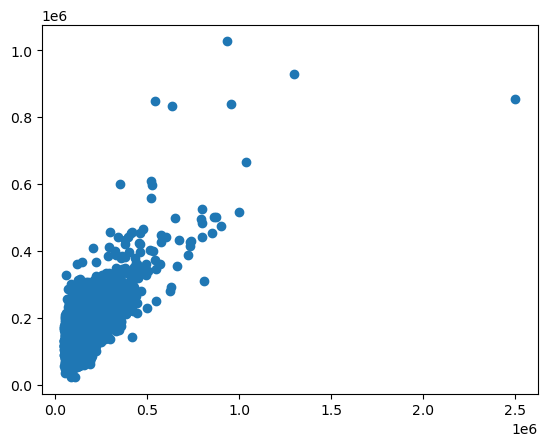

In [19]:
plt.scatter(y_test, y_pred)


Mean Squared Error: 2154378949.1722383


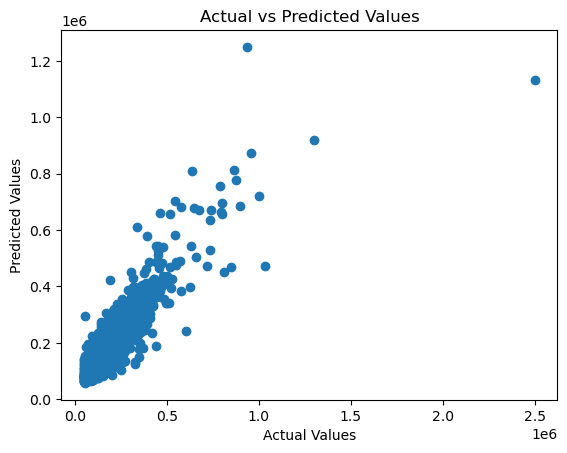

Random Forest Regression Score: 0.7939095160425202


RandomForestRegressor()

In [20]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

score = model.score(X_test, y_test)
print(f'Random Forest Regression Score: {score}')

# Random Forest Regressor Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

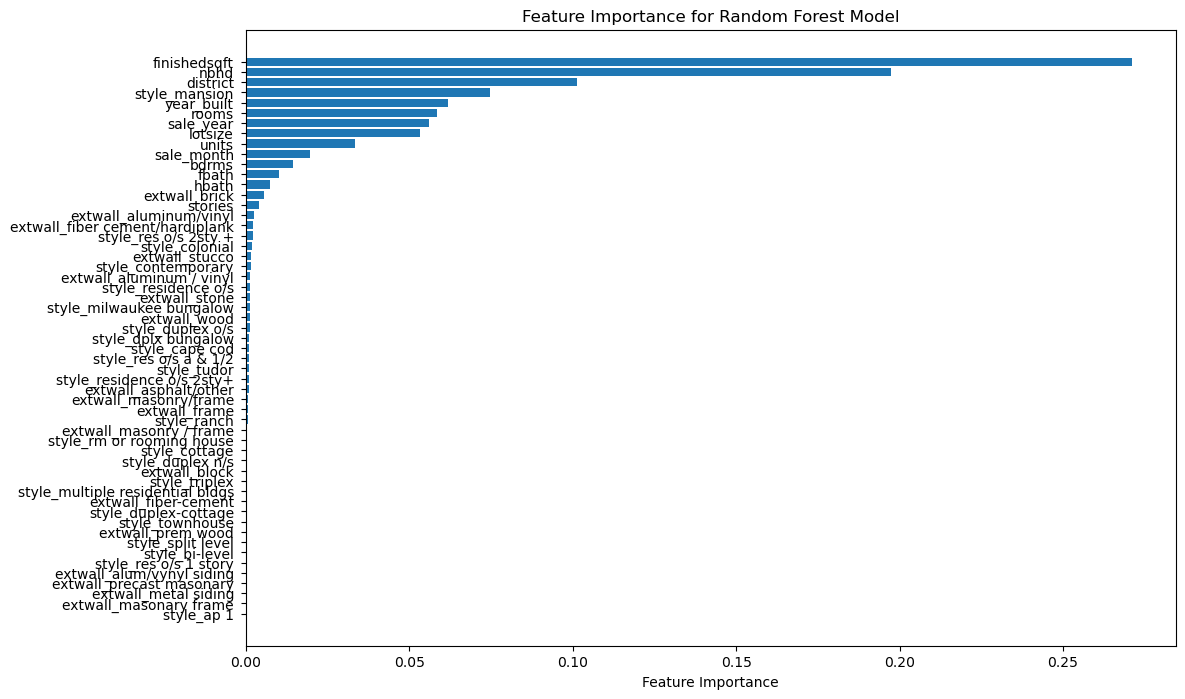

In [21]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Feature Importance for Random Forest
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))  # Increased figure size
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')

# Adjust y-axis label spacing
plt.gca().invert_yaxis()  # Highest importance at the top
plt.gca().yaxis.set_tick_params(pad=5)  # Increase space between labels

plt.show()


In [22]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,132967.33
1,157137.00
2,190739.00
3,142826.35
4,131747.00
...,...
3786,169418.00
3787,171146.00
3788,256411.00
3789,88795.35


In [23]:
y_test

7901     330000.0
198      124000.0
13573    232500.0
34758    111250.0
22900    146500.0
           ...   
22162    188400.0
19191    125000.0
9771     252000.0
32525     55000.0
10709     98900.0
Name: sale_price, Length: 3791, dtype: float64

In [24]:
# determining accuracy score 
model.score(X_test, y_test)

0.7939095160425202

## Random Forest Regressor

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2128675802.6401973


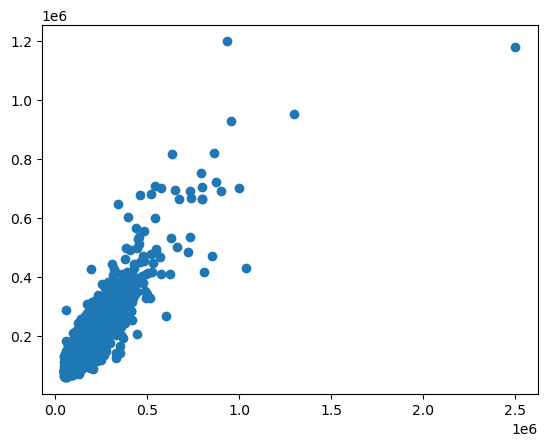

In [27]:
plt.scatter(y_test, y_pred)

In [28]:
model.score(X_test, y_test)

0.7963683099840659